# Trying to model ignition delay from RMG for GTL blended model with cross reactions considered when all the PRFs are added



In [1]:
import sys
sys.path.append('/scratch/ajulu.c/anaconda3/envs/rmg_py3/')

In [2]:
!which python
!conda list rmg_py3
!source activate rmg_py3

/scratch/ajulu.c/anaconda3/envs/rmg_py3/bin/python
# packages in environment at /scratch/ajulu.c/anaconda3/envs/rmg_py3:
#
# Name                    Version                   Build  Channel
Could not find conda environment: rmg_py3
You can list all discoverable environments with `conda info --envs`.



In [3]:
import cantera as ct
import numpy as np
%matplotlib inline

from matplotlib import pyplot as plt

ct.__version__

'2.4.0'

In [4]:
# from cantera import ck2cti
# ck2cti.main([
#     '--input=/scratch/ajulu.c/Code/GTL/chemkin/chem_annotated.inp',
#     '--tran=/scratch/ajulu.c/Code/GTL/chemkin/tran.dat',
#     '--output=/scratch/ajulu.c/Code/GTL/chemkin/chem_annotated.cti',
#     '--permissive'])

In [4]:
gas = ct.Solution('/scratch/ajulu.c/Code/GTL/chemkin/chem_annotated.cti')



**** WARNING ****
For species HOCHO(52), discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  -40.3604
	Value computed using high-temperature polynomial: -38.1678


In [5]:
sorted(gas.species_names)

['Ar',
 'C(1388)',
 'C(33)',
 'C10H20(32)',
 'C10H21(31)',
 'C2(1575)',
 'C2H(6)',
 'C2H2(43)',
 'C2H3(25)',
 'C2H3O(120)',
 'C2H3O(196)',
 'C2H3O(262)',
 'C2H3O3(61)',
 'C2H3O3(62)',
 'C2H4(13)',
 'C2H4(1970)',
 'C2H4O(165)',
 'C2H4O(214)',
 'C2H4O(310)',
 'C2H5(34)',
 'C2H5CO(50)',
 'C2H5O(242)',
 'C2H5O(47)',
 'C2H5O3(58)',
 'C2H5OH(48)',
 'C2H6(1391)',
 'C2H6O(241)',
 'C2HO2(523)',
 'C2HO4(441)',
 'C2O(1392)',
 'C3H2O(328)',
 'C3H3(59)',
 'C3H3O(202)',
 'C3H3O(373)',
 'C3H3O(612)',
 'C3H3O(738)',
 'C3H4(29)',
 'C3H4-P(42)',
 'C3H4O(171)',
 'C3H4O(364)',
 'C3H5(1016)',
 'C3H5(1064)',
 'C3H5(27)',
 'C3H5O(116)',
 'C3H5O(122)',
 'C3H5O(198)',
 'C3H5O(244)',
 'C3H5O(282)',
 'C3H5O(303)',
 'C3H6(14)',
 'C3H6O(167)',
 'C3H6O(240)',
 'C3H6O(249)',
 'C3H6O(250)',
 'C3H6O(271)',
 'C3H6O3(71)',
 'C3H6O5(99)',
 'C3H7(28)',
 'C3H7O(108)',
 'C3H7O(160)',
 'C3H7O(269)',
 'C3H7O4(75)',
 'C3H7O4(96)',
 'C3H8(35)',
 'C4H10(181)',
 'C4H10(49)',
 'C4H2(298)',
 'C4H3(109)',
 'C4H3(110)',
 'C4H3O(909)'

In [6]:
print(len(gas.species()), len(gas.reactions()))

2790 52854


In [7]:
from functools import partial 

def is_specie(specie_tuple, target):
    if target.composition in specie_tuple:
        return True 
    return False 

is_inspecie = partial(is_specie, ({"C": 8, "H":18},{"C":9,"H":18}, {"C":10, "H":22} ))

list(filter(is_inspecie, gas.species()))

[<Species nC10H22(1)>,
 <Species iC8H18(2)>,
 <Species n-pch(3)>,
 <Species S(1046)>,
 <Species S(1177)>,
 <Species S(1412)>,
 <Species S(1489)>,
 <Species S(1490)>,
 <Species S(1812)>,
 <Species S(2067)>,
 <Species S(2185)>,
 <Species S(2452)>,
 <Species S(2453)>,
 <Species S(2729)>]

In [10]:
# for species in gas.species():
#     if species.composition == {'C':8,'H':18}:
#         print(species.name)
#     if species.composition == {'C':9,'H':18}:
#         print(species.name)
#     if species.composition == {'C':10,'H':22}:
#         print(species.name)

In [8]:
species_names = {
    'nc10':'nC10H22(1)',
    'ic8':'iC8H18(2)',
    'pch':'n-pch(3)',
    'Ar':'Ar',
    'N2':'N2',
    'O2':'O2(4)',
    'O':'O(7)',
    'C2H':'C2H(6)',
    'OH':'OH(1387)'
}

In [9]:
for s in species_names.values():
    assert s in gas.species_names, "{} not found".format(s)

In [10]:
gas.TP = 1000, 1e5
gas.set_equivalence_ratio(phi=1.0, fuel= {
                        species_names['nc10']:0.000577,
                        species_names['ic8']:0.000332,
                        species_names['pch']:0.000091}, oxidizer={
                        species_names['O2']:0.21,
                        species_names['N2']:0.79})
gas()


  gas:

       temperature            1000  K
          pressure          100000  Pa
           density        0.364833  kg/m^3
  mean mol. weight         30.3339  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      7.2135e+05        2.188e+07     J
   internal energy      4.4725e+05        1.357e+07     J
           entropy          8121.4        2.464e+05     J/K
    Gibbs function        -7.4e+06       -2.245e+08     J
 heat capacity c_p          1314.5        3.987e+04     J/K
 heat capacity c_v          1040.4        3.156e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.778584         0.719025         -25.1152
        nC10H22(1)     0.00833815         0.039111         -121.216
         iC8H18(2)     0.00479769         0.018067          -100.09
          n-pch(3)     0.001

In [11]:
def set_gas_concentrations(gas, phi):
    """
    Set the concentrations in the gas according to the description
    in the paper by 
    """
    # Set it to desired stoichiometry with synthetic air (20% O2 : 80% N2)
    gas.set_equivalence_ratio(phi=1.0, fuel= {
                        species_names['nc10']:0.000577,
                        species_names['ic8']:0.000332,
                        species_names['pch']:0.000091}, oxidizer={
                        species_names['O2']:0.21,
                        species_names['N2']:0.79})
    # Then dilute the whole thing 1:2 with extra N2
    X = gas.X / 3.0 
    X[gas.species_index('N2')] += 2./3.
    gas.X = X

set_gas_concentrations(gas, 1.0)
gas()


  gas:

       temperature            1000  K
          pressure          105374  Pa
           density        0.364833  kg/m^3
  mean mol. weight          28.787  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       7.508e+05        2.161e+07     J
   internal energy      4.6197e+05         1.33e+07     J
           entropy          8147.9        2.346e+05     J/K
    Gibbs function     -7.3971e+06       -2.129e+08     J
 heat capacity c_p            1218        3.506e+04     J/K
 heat capacity c_v          929.15        2.675e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.926195         0.901308         -24.8893
        nC10H22(1)     0.00277938        0.0137376         -122.262
         iC8H18(2)     0.00159923       0.00634598         -101.137
          n-pch(3)    0.0004

# This section computes the OH sensitivity of the first 20 reactions 

In [12]:
def get_sensitivities(gas, TPX, max_n=None):
    """
    Get sensitivity of OH with respect to k for the first max_n reactions.
    """
    gas.TPX = TPX
    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])

    # number of reactions to consider
    if max_n is None:
        global n_sens
        n_sens = len(gas.reactions())
    else:
        n_sens = min(max_n, len(gas.reactions()))

    for i in range(n_sens):
        reactor.add_sensitivity_reaction(i)

    reactor_network.step()
    
    oh_sensitivities = np.zeros(n_sens)
    for i in range(n_sens):
        oh_sensitivities[i] = reactor_network.sensitivity(species_names['OH'], i)

    global ranking 
    
    ranking = list(reversed(np.argsort(np.abs(oh_sensitivities))))

    print(f"Top 20 sensitivities (of the first {n_sens} considered)")
    for i, j in enumerate(ranking[:20]):
        print(i, j,
              reactor_network.sensitivity_parameter_name(j), 
              oh_sensitivities[j]
             )
    
    return oh_sensitivities

# The ignition delay function is defined here with the sensitivity argument given as an option

In [13]:
def get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=False, sensitivity=False):
    """
    A general function to find the igniton delay.
    Using C2H + O --> CH* as the indication of ignition
    
    gas is a cantera Solution object
    temperature in K
    pressure_bar is in bar
    mole_fractions is a dict
    
    sensitivity is Boolean, whether to run sensitivity analysis
    """
    gas.TPX = temperature, pressure_bar*1e5, mole_fractions

    reactor = ct.IdealGasReactor(gas)
    reactor_network = ct.ReactorNet([reactor])
    
    time = 0.0
    end_time = 20e-3
    
    times = []
    concentrations = []
    pressures = []
    temperatures = []

    # set the tolerances for the solution and for the sensitivity coefficients
    reactor_network.rtol = 1.0e-6
    reactor_network.atol = 1.0e-15
    reactor_network.rtol_sensitivity = 1.0e-6
    reactor_network.atol_sensitivity = 1.0e-6
            
    print_data = True
    sensitivity_done = False
    while time < end_time:
        time = reactor_network.time
        times.append(time)
        temperatures.append(reactor.T)
        pressures.append(reactor.thermo.P)
        concentrations.append(reactor.thermo.concentrations)
        
        # take a timestep
        # the size of the step will be determined by the ODE solver
        # depending on how quickly things are changing.
        reactor_network.step()
        
        # Some timestep:
        if sensitivity and not sensitivity_done:
            if reactor.T > temperature + 100: # do it when T has risen 100K above start point
                global TPX_for_sensitivity
                TPX_for_sensitivity = gas.TPX
                global time_for_sensitivity
                time_for_sensitivity = time
                sensitivity_done = True # just do it once
        
    print("Reached end time {0:.2f} ms in {1} steps".format(times[-1]*1e3, len(times)))
    # convert the lists into arrays
    concentrations = np.array(concentrations)
    times = np.array(times)
    pressures = np.array(pressures)
    temperatures = np.array(temperatures)

    if plot:
        plt.subplot(2,1,1)
        plt.plot(times*1e3, pressures/1e5)
        plt.ylabel("Pressure (bar)", color='b')
        ax2 = plt.gca().twinx()
        ax2.set_ylabel('Temperature (K)', color='r')
        ax2.plot(times*1e3, temperatures, 'r')
    # Using C2H + O --> CH* as the indication of ignition
    i_c2h = gas.species_index(species_names['C2H'])   
    i_o = gas.species_index(species_names['O'])
    excited_ch_generation = concentrations[:,i_o] * concentrations[:,i_c2h]
    if plot:
        plt.subplot(2,1,2)
        plt.plot(times*1e3, excited_ch_generation, 'g')
        plt.ylabel("CH* emission")
        plt.ylim(0,max(1e-13,1.1*max(excited_ch_generation)))
        plt.xlabel("Time (ms)")
        plt.tight_layout()
        plt.show()
    step_with_highest_ch_gen = excited_ch_generation.argmax()
        
    if step_with_highest_ch_gen > 1 and excited_ch_generation.max()>1e-20:
        ignition_time_ms = 1e3 * times[step_with_highest_ch_gen]
        print("At {0} K {1} bar, ignition delay time is {2} ms".format(temperature, pressure_bar, ignition_time_ms))
    else:
        print("At {0} K {1} bar, no ignition detected".format(temperature, pressure_bar))
        ignition_time_ms = np.infty
    
    print(f"Performing sensitivity at time {time_for_sensitivity/1000} ms at {gas.T} K, {gas.P} Pa")
    print()
    get_sensitivities(gas, TPX_for_sensitivity)
    
    return ignition_time_ms

In [14]:
def get_ignition_delay_air_n2(temperature, pressure_bar=16, phi=1.0, plot=False, sensitivity=False):
    """
    For figure 14
    
    temperature in K
    pressure in bar
    phi is equivalence ratio
    burns DME in air
    """
    gas.TP = temperature, pressure_bar*1e5
    set_gas_concentrations(gas,phi)
    mole_fractions = gas.X
    if plot:
        gas()

    time = get_ignition_delay(gas, temperature, pressure_bar, mole_fractions, plot=plot, sensitivity=sensitivity)
    return time


  gas:

       temperature         833.333  K
          pressure     1.68598e+06  Pa
           density          7.0048  kg/m^3
  mean mol. weight          28.787  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy       5.513e+05        1.587e+07     J
   internal energy      3.1061e+05        8.942e+06     J
           entropy            7129        2.052e+05     J/K
    Gibbs function     -5.3895e+06       -1.551e+08     J
 heat capacity c_p          1175.2        3.383e+04     J/K
 heat capacity c_v          886.33        2.551e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                N2       0.926195         0.901308         -21.6687
        nC10H22(1)     0.00277938        0.0137376         -119.684
         iC8H18(2)     0.00159923       0.00634598         -98.9495
          n-pch(3)    0.0004

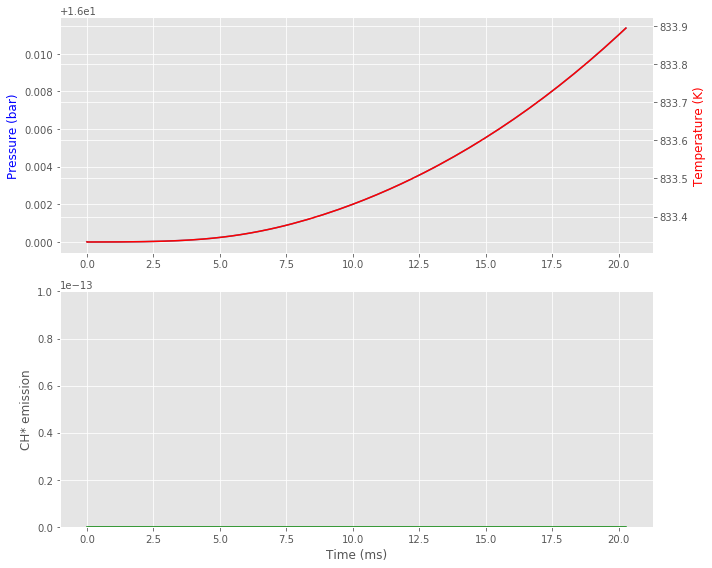

In [ ]:
initial_idt = get_ignition_delay_air_n2(1000/1.2, 16, 1, plot=True, sensitivity=True)
plt.rcParams['figure.figsize'] = [10, 8]

# Sensitivity perturbation with a scale factor of 1e-2

In [16]:
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')

plt.rcParams['figure.autolayout'] = True
import pandas as pd

In [17]:
# Create a dataframe to store sensitivity-analysis data
sensitivities = pd.DataFrame(data=[], index=gas.reaction_equations(ranking[:20]))

In [18]:
# Create an empty column to store the sensitivities data
sensitivities["baseCase"] = ""

In [20]:
dk = 1e-2 #perturb the oh_sensitivities

for i, j in enumerate(ranking[:20]):
    print(gas.reaction(j))
    gas.set_multiplier(1.0+dk,j)
    print(f"Multiplying reaction {j} rate constant by 10 in {gas.reaction(j)}")


    new_idt = get_ignition_delay_air_n2(1000/1.2, 16, 1, plot=False, sensitivity=False)
    sensitivities["baseCase"][i] = (new_idt - initial_idt)/(initial_idt*dk)
    
gas.set_multiplier(1.0)

2 OH(1387) (+M) <=> H2O2(17) (+M)
Multiplying reaction 13 rate constant by 10 in 2 OH(1387) (+M) <=> H2O2(17) (+M)
Reached end time 20.27 ms in 266 steps
At 833.3333333333334 K 16 bar, no ignition detected
Performing sensitivity at time 3.3191530828926794e-07 ms at 833.9138663453806 K, 1601174.8420460564 Pa

Top 20 sensitivities (of the first 52854 considered)
0 13 IdealGasReactor_4: 2 OH(1387) (+M) <=> H2O2(17) (+M) 2.152235384583744e-05
1 79 IdealGasReactor_4: CH2O(11) + OH(1387) <=> H2O(10) + HCO(44) -7.175521800566419e-06
2 0 IdealGasReactor_4: H(19) + O2(4) <=> O(7) + OH(1387) 3.763276370838602e-06
3 249 IdealGasReactor_4: C2H4(13) + OH(1387) <=> C2H3(25) + H2O(10) -3.6289632656458867e-06
4 91 IdealGasReactor_4: CH3(20) + HO2(18) <=> CH3O(23) + OH(1387) 3.092097388211912e-06
5 364 IdealGasReactor_4: C3H6(14) + OH(1387) <=> C3H5(27) + H2O(10) -3.0690064001157577e-06
6 2 IdealGasReactor_4: H2(15) + OH(1387) <=> H(19) + H2O(10) -2.43788388720766e-06
7 120 IdealGasReactor_4: CH4(12) +

NameError: name 'initial_idt' is not defined

In [21]:
sensitivities.head()

,baseCase
2 OH(1387) (+M) <=> H2O2(17) (+M),
CH2O(11) + OH(1387) <=> H2O(10) + HCO(44),
H(19) + O2(4) <=> O(7) + OH(1387),
C2H4(13) + OH(1387) <=> C2H3(25) + H2O(10),
CH3(20) + HO2(18) <=> CH3O(23) + OH(1387),


#### The sensitivity of the OH concentration is a measure in the change of the rate constant of the ignition delay time before scaling and the ignition delay time after the rate constant has been scaled by a factor of 1+dk where dk = 1e-2 with respect to the scaling factor dk times the initial ignition delay time

In [ ]:
RMG_temperatures = 1000/np.linspace(0.70,1.6,10)
pressures_bar = 16
phi = 1

RMG_results = dict()
times = []
for T in RMG_temperatures:
    t = get_ignition_delay_air_n2(T,pressures_bar, phi, plot=False)
    times.append(t)
    RMG_results[pressures_bar]=times

In [ ]:
plt.semilogy(1000/RMG_temperatures,RMG_results[pressures_bar],label='{}bar'.format(pressures_bar))
plt.legend(loc='best')
plt.xlabel('1000 K / $T$')
plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
plt.rcParams['figure.figsize'] = [10, 8]

In [ ]:
import pickle
with open('ic8-RMG_no_moving_wall.pkl','wb') as fp:
    pickle.dump((RMG_temperatures, RMG_results[pressures_bar]), fp)

In [ ]:
# # extracted values of predicted ignition delay for iso-octane in Fig.14 
# # using the docstrings
# predict_ic8 = """0.657614                 0.0438935
# 0.660053                 0.0508193
# 0.668666                 0.0605986
# 0.674810                 0.0712038
# 0.682193                 0.0824521
# 0.690803                 0.0997690
# 0.695710                 0.117224
# 0.705556                 0.141850
# 0.712933                 0.169140
# 0.722793                 0.193028
# 0.730166                 0.233559
# 0.740019                 0.274467
# 0.748628                 0.332111
# 0.759721                 0.384622
# 0.765868                 0.445364
# 0.775710                 0.546873
# 0.786810                 0.615061
# 0.799138                 0.712339
# 0.806515                 0.849383
# 0.818843                 0.983721
# 0.829936                 1.13926
# 0.843501                 1.31950
# 0.852120                 1.52800
# 0.864449                 1.76967
# 0.878014                 2.04964
# 0.889110                 2.33921
# 0.900212                 2.59264
# 0.910061                 3.09168
# 0.927338                 3.52918
# 0.935965                 3.96890
# 0.942116                 4.52889
# 0.958153                 5.24581
# 0.969245                 6.07524
# 0.985293                 6.73451
# 0.993909                 7.91373
# 1.00872                  8.90155
# 1.02476                  9.86753
# 1.03338                  11.4268
# 1.04572                  12.8521
# 1.06423                  14.6714
# 1.07409                  16.9904
# 1.08520                  18.5574
# 1.10124                  21.1825
# 1.11357                  23.4784
# 1.12466                  27.5917
# 1.13824                  30.1389
# 1.14933                  35.4191
# 1.16290                  39.8386
# 1.17523                  46.1394
# 1.18633                  51.8925
# 1.19865                  61.8858
# 1.20728                  68.5850
# 1.21961                  80.6040
# 1.23070                  94.7255
# """

# ign_times = []
# temps = []

# for k in predict_ic8.splitlines():
#     temp, ign_time = k.split()
#     temps.append(float(temp))
#     ign_times.append(float(ign_time))
    
# ign_times = np.array(ign_times)
# temps = np.array(temps)
# #print(temps, ign_times)

In [ ]:
# experiment_ic8 = """ 0.742197            0.129438
# 0.792731            0.238540
# 0.858775            0.582623
# 0.897119            1.02386
# 0.916046            1.35725
# 1.01424             4.07608
# 1.05446             8.48794
# 1.08368             10.3738
# 1.11478             15.2007
# 1.16585             24.9217
# 1.17410             28.0282
# 1.18433             30.0848
# """

# exp_ign_times = []
# exp_temps = []



# for z in experiment_ic8.splitlines():
#     exp_temp, exp_ign_time = z.split()
#     exp_temps.append(float(exp_temp))
#     exp_ign_times.append(float(exp_ign_time))
    
# exp_ign_times = np.array(exp_ign_times)
# exp_temps = np.array(exp_temps)

# plt.semilogy(temps,ign_times, 'r.:')
# plt.semilogy(exp_temps,exp_ign_times, 'g+')
# plt.title("Dagaut's Figure 14, iso-octane")

In [ ]:
# plt.semilogy(1000/RMG_temperatures,RMG_results[pressures_bar],label='RMG plots {}bar'.format(pressures_bar))
# plt.semilogy(temps,ign_times, 'r.:', label='Dagaut et al. Prediction Fig.14'.format(pressures_bar))
# plt.semilogy(exp_temps,exp_ign_times, 'g+',label='Experimental values{}bar'.format(pressures_bar))
# plt.legend(loc='best')
# plt.xlabel('1000 K / $T$')
# plt.ylabel('$\\tau_{ign} = t([CH^*]_{max})/ms$')
# plt.rcParams['figure.figsize'] = [10, 8]
# plt.show